<img src='./figures/logo_ecole_polytechnique_IPP.png' style='position:absolute; top:0; right:0;' width='80px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Algorithms for Discrete Mathematics, year 2, semester 1</center>
<center>Lecturer: Ziad Kobeissi <a href="mailto:ziad.kobeissi@inria.fr">(send mail)</a></center>
<center>Notebook by Lucas Gérin</center>

# Symbolic computing 2: Generating functions with SymPy


## Table of contents

- [Exercice 1: Fibonacci sequence and GF's](#Fibo)
- [Exercise 2: A recurrence of order two and asymptotics](#SimpleRecurrence)
- [Exercise 3: A pair of GF](#Pair)
- [Exercise 3 (cont'ed): Automatic decompositions of fractions](#Decomposition)
- [Exercise 4: Quadratic GF](#quadratic)
- [Exercise5: A continued fraction](#continued)




In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from pylab import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<a id="GeneratingFunctions"></a>
## Basics of generating functions

Let us first explain how we will manipulate generating functions with `SymPy`. We consider the example of 
<br><br>
$$
f(x)=\frac{1}{1-2x}=1+2x+4x^2+8x^3+16x^4+ \dots
$$
<br>
We first introduce a symbolic variable $x$ and an expression $f$ as follows:

In [3]:
x=var('x')
f=(1/(1-2*x))

print('f = '+str(f))
print('-----')
print('We check that coefficients are correct:')
print('series expansion of f at 0 and of order 10 is: '+str(f.series(x,0,10)))


f = 1/(1 - 2*x)
-----
We check that coefficients are correct:
series expansion of f at 0 and of order 10 is: 1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + 256*x**8 + 512*x**9 + O(x**10)


One can extract $n$-th coefficient as follows:
* $f$ has to be truncated at order $k$ (for some $k>n$) with `f.series(x,0,k)`
* the $n$-th coefficient is then extracted by `f.coeff(x**n)`

In [4]:
f_truncated = f.series(x,0,8)
print('Truncation of f is '+str(f_truncated))
n=6
nthcoefficient=f_truncated.coeff(x**n)
print(str(n)+'th coefficient is: '+str(nthcoefficient))


Truncation of f is 1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + O(x**8)
6th coefficient is: 64


<a id="Fibo"></a>
### Exercise 1. Fibonacci generating function

Let $f_n$ be the Fibonacci sequence defined by $f_0=1$, $f_1=1$ and for all $n\geq 2$,
$$
f_n=f_{n-1}+f_{n-2}.
$$

<div markdown=1 class="DoIt"> 

1. Write a recursive function `Fibonacci(n)` which returns the $n$-th Fibonacci number.
1. Let $F$ be the generating function associated to the sequence $(f_n)$. Show that
$$
F(x)=\frac{1}{1-x-x^2}.
$$
2. Write another function `FibonacciGF(n)` which also returns the $n$-th Fibonacci number by extracting the $n$-th coefficient in $F(x)$.

In [15]:
def Fibonacci(n):
    if n==0 or n==1:
        return 1
    else:
        return Fibonacci(n-1)+Fibonacci(n-2)
    
def Fibonacci2(n):
    new_term=1
    old_term =1
    for i in range(1,n):
        aux = new_term
        new_term += old_term
        old_term = aux
    return new_term
    
print([Fibonacci(n) for n in range(20)])
print([Fibonacci2(n) for n in range(20)])


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


<div markdown=1 class="Answers">
2. Let $n\geq 2$ and $x>0$:
\begin{align*}
\sum_{n\geq 2} f_n x^n &= \sum_{n\geq 2} f_{n-1} x^n + \sum_{n\geq 2} f_{n-2}x^n \\
F(x)-1-x &= \sum_{p\geq 1} f_{p} x^{p+1} + \sum_{q\geq 0} f_{q}x^{q+2}  \qquad \text{(we put }n-2=p\text{ and }n-1=q)\\
F(x)-1-x &= x\sum_{p\geq 1} f_{p} x^{p} + x^2\sum_{q\geq 0} f_{q}x^{q}\\
F(x)-1-x &= x(F(x)-1) + x^2F(x).
\end{align*}
We solve this last equation with the following script:

In [6]:
var('x F')
SeriesF=solve(F-1-x-x*(F-1)-x**2*F,F)
print('The expression of F is: ')
display(SeriesF[0])
        
    

The expression of F is: 


-1/(x**2 + x - 1)

In [7]:
def FibonacciGF(n):
    x=var('x')
    f=(1/(1-x-x**2))
    f_truncated=f.series(x,0,n+1)
    return f_truncated.coeff(x**n)


print('Coefficients computed by recursion:')
print([Fibonacci(n) for n in range(1,20)])
print('Coefficients computed with GF:')
print([FibonacciGF(n) for n in range(1,20)])

Coefficients computed by recursion:
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
Coefficients computed with GF:
[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


<a id="SimpleRecurrence"></a>
### Exercise 2. Recurrence of order two and asymptotics

<div markdown=1 class="DoIt"> 


Let $j_n$ be defined by
$
\begin{align}
j_0&=0, \notag\\
j_1&=1, \notag\\
j_2&=2,\notag\\
j_n&=2j_{n-2}+5 \qquad (\text{ for every }n\geq 3). \tag{#}
\end{align}
$

<div markdown=1 class="DoIt"> 
**(Theory)** Find the expression for the generating function $J(x)$ of the $j_n$'s.<br>


<div markdown=1 class="Answers">


1. We multiply eq. $(\#)$ by $x^n$ and sum the resulting expression for all $n\geq 3$:
\begin{align*}
\sum_{n\geq 3} j_n x^n &= 2 \sum_{n\geq 3} j_{n-2} x^n + 5\sum_{n\geq 3} x^n \\
J(x)-j_1x-j_2x^2 &= 2 \sum_{p\geq 1} j_{p} x^{p+2} + 5(x^3+x^4+x^5+\dots) \qquad \text{(we put }n-2=p)\\
J(x)-x-2x^2 &= 2 x^2J(x) + 5\frac{x^3}{1-x}.
\end{align*}
We solve this last equation with the following script:

In [8]:
x=symbols('x')
j=symbols('j')
SeriesJ=solve(j-x-2*x**2-2*x**2*j-5*x**3/(1-x),j)
print('The solution is: J(x)= ')
display(SeriesJ[0])
solutionJ=SeriesJ[0]  
    

The solution is: J(x)= 


x*(3*x**2 + x + 1)/(2*x**3 - 2*x**2 - x + 1)

<div markdown=1 class="Answers">
We find
$$
J(x)= \frac{x \left(3 x^{2} + x + 1\right)}{2 x^{3} - 2 x^{2} - x + 1}
$$

<div markdown=1 class="DoIt"> 
1. Write a function which extracts the $n$-th coefficient in $J(x)$.<br>
2. Compare your results with a recursive function which computes the $j_n$'s.</i>

In [9]:
# Question 1
def j_GF(n):
    x=symbols('x')
    j= Function('j')
    j=solutionJ
    j_truncated=j.series(x,0,n+1)
    return j_truncated.coeff(x**n)


print('With GFs we obtain:')
print([j_GF(n) for n in range(1,15)])

# Question 2

def j_recursive(n):
    if n==1:
        return 1
    elif n==2:
        return 2
    else:
        return 2*j_recursive(n-2)+5

print('With recursion we obtain:')
print([j_recursive(n) for n in range(1,15)])



With GFs we obtain:
[1, 2, 7, 9, 19, 23, 43, 51, 91, 107, 187, 219, 379, 443]
With recursion we obtain:
[1, 2, 7, 9, 19, 23, 43, 51, 91, 107, 187, 219, 379, 443]


<div markdown=1 class="DoIt"> 
1. What is the radius of convergence of $J(x)$? (You can ask help to SymPy.)
2. What does it imply for the asymptotic behaviour of $j_n$? (Apply the "exponential growth formula", that we saw in class.)<br>

In [10]:
solve(2*x**3-2*x**2-x+1,x)

[1, -sqrt(2)/2, sqrt(2)/2]

<div markdown=1 class="Answers"> 

1. $J$ is a rational fraction, it explodes exactly when the denominator is zero. The radius of convergence $\rho$ of $J(x)$ is therefore the smallest positive solution of $2 \rho^{3} - 2 \rho^{2} - \rho + 1=0$, <i>i.e.</i>
$$
\rho= \sqrt{2}/2=1/\sqrt{2}
$$
according to the previous script.
2. The exponential growth formula says that for every $\varepsilon$, for $n$ large enough
$$
C_1(\sqrt{2}-\varepsilon)^n =C_1(1/\rho-\varepsilon)^n \leq J_n \leq C_2(1/\rho+\varepsilon)^n =C_2 (\sqrt{2}+\varepsilon)^n.
$$
(The exponential growth formula only ensures that the left inequality holds for infinitely many $n$'s.)

<div markdown=1 class="DoIt"> With a plot, find an approximation of $r$ such that $j_n$ grows like $\text{const}\times r^n$. Compare with the previous question.

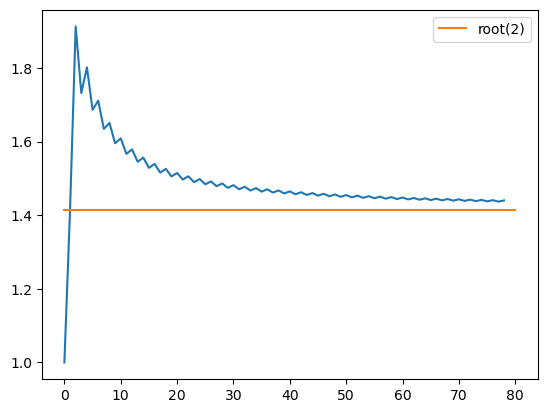

In [12]:
N=80
RenormalizedValues=[j_recursive(n)**(1./n) for n in range(1,N)]
plt.plot(RenormalizedValues)
plt.plot([0,N],[np.sqrt(2),np.sqrt(2)],label='root(2)')

plt.legend()
plt.show()

<div markdown=1 class="Answers"> 
We plot $n\mapsto (j_n)^{1/n}$ which seems to converge to $\sqrt{2}$. This is consistent with the exponential growth formula.

<a id="Pair"></a>
### Exercise 3. A pair of generating functions

Let $a_n,b_n$ be defined by $a_1=b_1=1$ and, for every $n\geq 1$,
\begin{equation}
\begin{cases}
a_{n+1}&= a_n +2b_n,\\
b_{n+1}&= a_n +b_n.
\end{cases}
\tag{&}
\end{equation}


<div markdown=1 class="DoIt"> 
1. Find a $2\times 2$ system whose solutions are $A(x),B(x)$ , where $A,B$ are the generating functions of sequences $(a_n)_{n\geq 1},(b_n)_{n\geq 1}$. <i>(Coefficients of this system should depend on $x$.)</i>
2. Solve this system with `solve` and write a script which uses function $A$ to return $a_1,\dots,a_{20}$.

<div markdown=1 class="Answers">
1. We multiply both terms of both equations in eq.(&) by $x^{n+1}$ and take the sum for $n\geq 1$. We obtain
$$
\begin{cases}
\sum_{n\geq 1}a_{n+1}x^{n+1}&= \sum_{n\geq 1}a_{n}x^{n+1} +2\sum_{n\geq 1}b_{n}x^{n+1},\\
\sum_{n\geq 1}b_{n+1}x^{n+1}&= \sum_{n\geq 1}a_{n}x^{n+1} +\sum_{n\geq 1}b_{n}x^{n+1}.\\
\end{cases}
$$
We find
$$
\begin{cases}
A(x)-x&= xA(x) +2xB(x),\\
B(x)-x&= xA(x)+xB(x).\\
\end{cases}
$$
In the subsequent script we solve this sytem of equations. We find
$$
\begin{cases}
A(x)&=- \frac{x \left(x + 1\right)}{x^{2} + 2 x - 1}\\
B(x)&=- \frac{x}{x^{2} + 2 x - 1}
\end{cases}.
$$

In [5]:
#---- Question 2
# We solve the system
var('A B x')
Solutions=solve([A-x-x*A-2*x*B,B-x-x*A-x*B],[A,B])
print(Solutions)
# We obtain the following expression:
FunctionA=-x*(x + 1)/(x**2 + 2*x - 1)
FunctionB=-x/(x**2 + 2*x - 1)
print("A(x) = "+str(FunctionA.series(x,0,10)))
print("B(x) = "+str(FunctionB.series(x,0,10)))

# We extract a_1,a_2,...
N=20

A_truncated = FunctionA.series(x,0,N+2)
FirstCoefficients= [A_truncated.coeff(x**n) for n in range(1,N+1)] 
print(FirstCoefficients)


{B: -x/(x**2 + 2*x - 1), A: -x*(x + 1)/(x**2 + 2*x - 1)}
A(x) = x + 3*x**2 + 7*x**3 + 17*x**4 + 41*x**5 + 99*x**6 + 239*x**7 + 577*x**8 + 1393*x**9 + O(x**10)
B(x) = x + 2*x**2 + 5*x**3 + 12*x**4 + 29*x**5 + 70*x**6 + 169*x**7 + 408*x**8 + 985*x**9 + O(x**10)
[1, 3, 7, 17, 41, 99, 239, 577, 1393, 3363, 8119, 19601, 47321, 114243, 275807, 665857, 1607521, 3880899, 9369319, 22619537]


<a id="Decomposition"></a>
# Automatic decomposition of fractions

In class we saw that for GFs it is useful to decompose fractions like this:
$$
\frac{1-x+x^2}{(1-2x)(1-x)^2} = \frac{3}{1-2x} - \frac{1}{1-x} - \frac{1}{(1-x)^2}.
$$
Here are examples on how to do that with SymPy.<br><br>

### Exercise 3 (continued)

<div markdown=1 class="DoIt"> 
The goal of the exercise is to find coefficients $\alpha,\beta,a,b,c$ such that 
$$
A(x)=\frac{a}{x-\alpha}+\frac{b}{x-\beta}+c,
$$
where 
$$
A(x)=\frac{-x \left(x + 1\right)}{x^2+2x-1}
$$
was defined in the previous exercise.
1. **(Theory)** Compute $\lim_{x\to +\infty} A(x)$ and deduce $c$.
2. **(Theory + SymPy)** Use`SymPy` to find coefficients $\alpha,\beta$.
3. **(Theory + SymPy)** Use`SymPy` again to find coefficients $a,b$. 

<div markdown=1 class="Answers">
Question 1. Taking the limit $(x\to +\infty)$ in the equation
$$
\frac{a}{x-\alpha}+\frac{b}{x-\beta}+c=\frac{-x \left(x + 1\right)}{x^2+2x-1}
$$
yields $0+0+c=-1$.

In [9]:
# Question 2
# We solve "denominator of A = 0" to find a,b
var('x')
solve(x**2+2*x-1,x)


[-1 + sqrt(2), -sqrt(2) - 1]

<div markdown=1 class="Answers">
Question 2.<br>
The short code above shows that
$$
A(x)= \frac{-x \left(x + 1\right)}{x^2+2x-1}= \frac{-x \left(x + 1\right)}{(x-(\sqrt{2}-1))(x-(-\sqrt{2}-1))}
$$
so we must have that $\alpha=\sqrt{2}-1$ and $\beta=-\sqrt{2}-1$ (or the contrary) to ensure that $A$ has the proper definition domain.

In [13]:
# Question 3
# We use A(1), A(0) to find alpha,beta

var('a b alpha beta x')

alpha=-1 + sqrt(2)
beta=-sqrt(2) - 1
# Left-hand side:
def A_factorized(x):
    return -(x*(x+1))/(x**2+2*x-1)

# Right-hand side:
def A_decomposed(x,a,b,alpha,beta):
    return a/(x-alpha)+b/(x-beta)+(-1)

# we identify a,b,c by solving the following system:
Solutions=solve([A_factorized(0)-A_decomposed(0,a,b,alpha,beta),A_factorized(1)-A_decomposed(1,a,b,alpha,beta)],[a,b])
print(Solutions)
astar=Solutions[a]
bstar=Solutions[b]

# to get a nice formula:
var('x')
print(latex(A_decomposed(x,astar,bstar,alpha,beta)))

{a: 1/2 - sqrt(2)/2, b: 1/2 + sqrt(2)/2}
-1 + \frac{\frac{1}{2} - \frac{\sqrt{2}}{2}}{x - \sqrt{2} + 1} + \frac{\frac{1}{2} + \frac{\sqrt{2}}{2}}{x + 1 + \sqrt{2}}


<div markdown=1 class="Answers">
In order to find $a,b$ we solve with the previous code the system
$$
\begin{cases}
A(0)&=\frac{a}{0-\alpha}+\frac{b}{0-\beta}+(-1)\\
A(1)&=\frac{a}{1-\alpha}+\frac{b}{1-\beta}+(-1)\\
\end{cases}
$$
with  $\alpha=\sqrt{2}-1$ and $\beta=-\sqrt{2}-1$. We find `{b: 1/2 + sqrt(2)/2, a: -sqrt(2)/2 + 1/2}` and finally
$$
A(x)=-1 + \frac{- \frac{\sqrt{2}}{2} + \frac{1}{2}}{x - \sqrt{2} + 1} + \frac{\frac{1}{2} + \frac{\sqrt{2}}{2}}{x + 1 + \sqrt{2}}.
$$

<div markdown=1 class="DoIt"> **(Bonus: Theory)** Deduce a proof of the formula
$$
a_n=\frac{1}{2} \left(1 + \sqrt{2}\right)^{n} + \frac{1}{2} \left(- \sqrt{2} + 1\right)^{n}
$$
<br>
<i>(Hint: Use the formula
$$
\frac{1}{x-\rho}= -\frac{1/\rho}{1-x/\rho} = -1/\rho \sum_{n\geq 0}x^n(1/\rho)^n. \tag{E}
$$
</i>


<div markdown=1 class="Answers">
We have that
$$
A(x)=-1 + \frac{- \frac{\sqrt{2}}{2} + \frac{1}{2}}{x - \alpha} + \frac{\frac{1}{2} + \frac{\sqrt{2}}{2}}{x -\beta}
$$
with $\alpha=\sqrt{2}-1$ and $\beta=-\sqrt{2}-1$. Using equation (E) with $\rho= \alpha $ and $\rho=\beta$ we obtain
\begin{align*}
A(x)&=-1 + \frac{1-\sqrt{2}}{2}  (-1/\alpha \sum_{n\geq 0}x^n(1/\alpha)^n)+ \frac{1+\sqrt{2}}{2}(-1/\rho \sum_{n\geq 0}x^n(1/\beta)^n)\\
&= -1 + \frac{1}{2}  \sum_{n\geq 0}x^n(1/\alpha)^n+ \frac{1}{2} \sum_{n\geq 0}x^n(1/\beta)^n\\
&= -1 + \frac{1}{2}  \sum_{n\geq 0}x^n(1+\sqrt{2})^n+ \frac{1}{2} \sum_{n\geq 0}x^n(1-\sqrt{2})^n
\end{align*}
since $1/\alpha=1+\sqrt{2}$ and $1/\beta = 1-\sqrt{2}$.

By identification of coefficients we obtain
$$
a_n=\frac{1}{2} \left(1 + \sqrt{2}\right)^{n} + \frac{1}{2} \left(- \sqrt{2} + 1\right)^{n}.
$$

## <a id="quadratic"></a>
### Exercise 4. A quadratic GF 

<div markdown=1 class="DoIt"> 
Let $(g_n)_{n\geq 0}$ be the sequence of non-negative integers such that the generating function $G(x)=\sum_{n\geq 0}g_n x^n$ satisfies the equation

$$
G(x)=x+x G(x)^2+1.
$$

1. Compute $g_0,g_1,\dots,g_{20}$.
2. **(More difficult)** Find the radius of convergence of $G$. 
3. What does it imply for the growth of the sequence $(g_n)$? 



In [15]:
# We first solve the equation
var('G x')
Solutions=solve(G-x-x*G*G-1,G)
print('2 solutions:')
display(Solutions)

# We obtain the following expression:
FunctionG0=Solutions[0]
FunctionG1=Solutions[1]

print("First solution G(x) = "+str(FunctionG0.series(x,0,10)))
print("2d solution G(x) = "+str(FunctionG1.series(x,0,10)))

# Only G0 has non-negative coefficients.

# We extract a_0,a_1,a_2,...,a_N
N=50

G_truncated = FunctionG0.series(x,0,N+2)
FirstCoefficients= [G_truncated.coeff(x**n) for n in range(N+1)] 
print(FirstCoefficients)

print(str(N)+'th coefficient = '+str(G_truncated.coeff(x**N)))

2 solutions:


[(1 - sqrt(-4*x**2 - 4*x + 1))/(2*x), (sqrt(-4*x**2 - 4*x + 1) + 1)/(2*x)]

First solution G(x) = 1 + 2*x + 4*x**2 + 12*x**3 + 40*x**4 + 144*x**5 + 544*x**6 + 2128*x**7 + 8544*x**8 + 35008*x**9 + O(x**10)
2d solution G(x) = 1/x - 1 - 2*x - 4*x**2 - 12*x**3 - 40*x**4 - 144*x**5 - 544*x**6 - 2128*x**7 - 8544*x**8 - 35008*x**9 + O(x**10)
[1 + O(x**52), 2, 4, 12, 40, 144, 544, 2128, 8544, 35008, 145792, 615296, 2625792, 11311616, 49124352, 214838528, 945350144, 4182412288, 18593224704, 83015133184, 372090122240, 1673660915712, 7552262979584, 34178799378432, 155096251351040, 705533929816064, 3216803739664384, 14697663906643968, 67285883401928704, 308597946991247360, 1417760538257522688, 6523879609950076928, 30064851377109467136, 138746816195824713728, 641153552757443526656, 2966493611621557469184, 13741593946629012979712, 63725837416706682650624, 295837567713348211965952, 1374760234138205341876224, 6394620177713789566713856, 29771215840837951027150848, 138724675767751307004215296, 646947142691253321799303168, 3019434407939117723773042688, 14102918112088228830023516

<div markdown=1 class="Answers"> 

1. According to the above script, the only $G$ solution which has non-negative coefficients is
$$
G(x)=\frac{1-\sqrt{1-4x^2-4x}}{2x}.
$$
According to SymPy
$$
g_{19}=83015133184 ,g_{20}= 37209012224 ,g_{21}=1673660915712
$$
2. We want to find when $G$ explodes. We might be worried by the fact that the denominator goes to. zero, but actually $G$ is well-defined when $x\to 0$. Indeed, using $\sqrt{1+h}=1+\tfrac{1}{2}h+o(h)$ we obtain
$$
G(x)=\frac{1-\sqrt{1-4x^2-4x}}{2x}=\frac{1}{2x}(1-\tfrac{1}{2}4x+o(x))\to 1.
$$
The series will explode when what is inside the square root is less than zero, <i>i.e.</i> when $1-4\rho^2-4\rho<0$. According to the code below we have $\rho=\frac{1}{2}(\sqrt{2}-1)$. 

In [17]:
var('rho')
radius=solve(1-4*rho**2-4*rho,rho)
print("rho =")
display(radius[0])
print("1/rho =")
display(simplify(1/radius[0]))

rho =


-1/2 + sqrt(2)/2

1/rho =


2 + 2*sqrt(2)

<div markdown=1 class="Answers"> 

3. Observe that $1/\rho=2+2\sqrt{2}$. The exponential growth formula tells us that for every $\varepsilon> 0$, for large enough $n$ then 
$$
(2+2\sqrt{2}-\varepsilon)^n \leq g_n \leq  (2+2\sqrt{2}+\varepsilon)^n.
$$
(The exponential growth formula only ensures that the left inequality holds for infinitely many $n$'s.)

## <a id='continued'></a>
### Exercise 5. A continued fraction (Taken from 2022 Test)

<div markdown=1 class="DoIt"> 
We set
$$
u_1=\frac{1}{3+1}, \quad u_2=\frac{1}{3+\frac{1}{3+1}},\quad u_3=\frac{1}{3+\frac{1}{3+\frac{1}{3+1}}}, \quad u_4=\frac{1}{3+\frac{1}{3+\frac{1}{3+\frac{1}{3+1}}}}, \dots
$$
Using SymPy, write $u_{25}$ as a rational fraction $a/b$.


In [10]:

def u_n(n):
    if n==1:
        return Rational(1,4)
    else:
        return Rational(1,3+u_n(n-1))


for n in range(1,27):
    print(n,'---',u_n(n))

print(N(u_n(25)))

1 --- 1/4
2 --- 4/13
3 --- 13/43
4 --- 43/142
5 --- 142/469
6 --- 469/1549
7 --- 1549/5116
8 --- 5116/16897
9 --- 16897/55807
10 --- 55807/184318
11 --- 184318/608761
12 --- 608761/2010601
13 --- 2010601/6640564
14 --- 6640564/21932293
15 --- 21932293/72437443
16 --- 72437443/239244622
17 --- 239244622/790171309
18 --- 790171309/2609758549
19 --- 2609758549/8619446956
20 --- 8619446956/28468099417
21 --- 28468099417/94023745207
22 --- 94023745207/310539335038
23 --- 310539335038/1025641750321
24 --- 1025641750321/3387464586001
25 --- 3387464586001/11188035508324
26 --- 11188035508324/36951571110973
0.302775637731995


<div markdown=1 class="Answers"> 
The sequence $(u_n)$ can be defined by $u_1=1/4$ and 
$$
u_{n+1}=\frac{1}{3+u_n}.
$$
Therefore the above script computes:
$$
u_{25}=\frac{3387464586001}{11188035508324}.
$$